In [ ]:
from GeoGuesserSystem import *

In [ ]:
BR = system_loader('SYS_ID_grid0')

In [ ]:
#BR_t = system_loader('SYS5_b')
#with torch.no_grad():
#    for x, y in zip(list(BR.NN.mods.parameters()), list(BR_t.NN.mods.parameters())):
#        x.copy_(y)
#save_system(BR, 'SYS5_b_full')

In [ ]:

if __name__ == '__main__':

    BR.prepare_dataloaders()

    BR.train(260)
    save_system(BR, 'SYS_ID_grid0')

  0%|          | 0/260 [00:00<?, ?it/s]

In [ ]:
BR.prepare_dataloaders()
BR.generate_test_main('test')

tt = BR.task_summary['geolocation'].copy()
tt = tt.applymap(lambda x: x[:12])
tt = tt.groupby('real')['pred'].value_counts().unstack(-1)
tt = tt.reindex(tt.index, axis=1).fillna(0)
test_acc = np.diag(tt).sum()/np.sum(tt.values, axis=None)
test_acc

In [6]:
BR.prepare_dataloaders()
BR.accuracy_calc()

(0.8051650866296175, 0.9721915962268773)

In [26]:
BR.generate_test_main(on='train')

In [27]:
tt = BR.task_summary['geolocation'].copy()
tt = tt.applymap(lambda x: x[:12])
tt = tt.groupby('real')['pred'].value_counts().unstack(-1)
tt = tt.reindex(tt.index, axis=1).fillna(0)
test_acc = np.diag(tt).sum()/np.sum(tt.values, axis=None)
test_acc

0.6870147912069952

In [47]:
from sklearn.metrics import r2_score

In [49]:
r2_score(BR.task_summary['max_temp']['real'], BR.task_summary['max_temp']['pred'])

0.2951321965760467

In [5]:
BR.task_summary['GDP'].corr()

,pred,real
pred,1.000000,0.511259
real,0.511259,1.000000


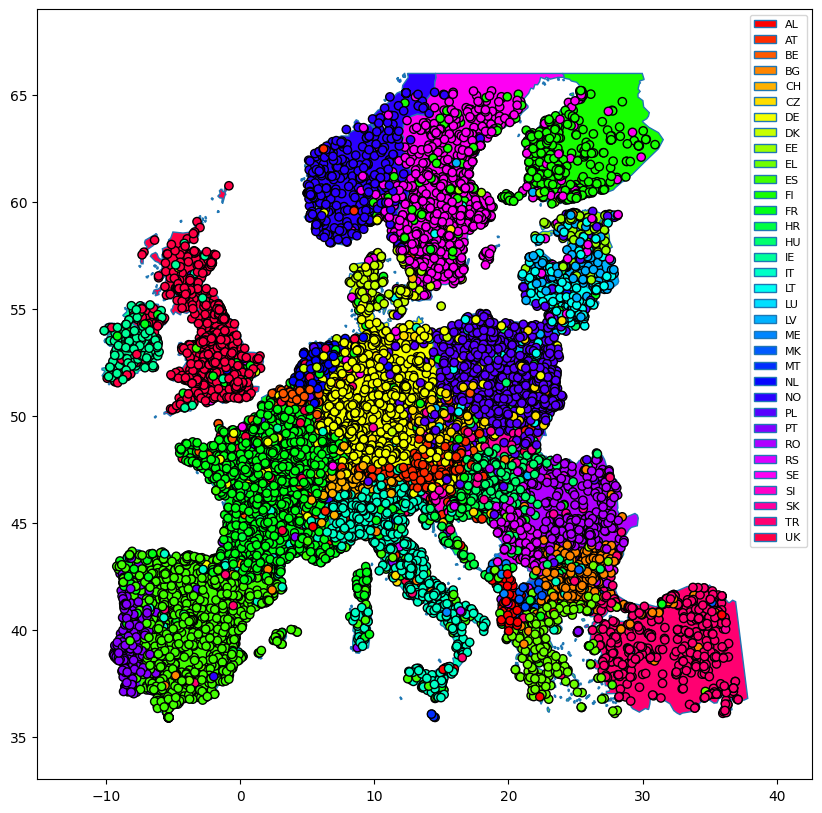

In [6]:
BR.metrics_and_plots(1)

In [7]:
save_system(BR, 'SYS5_d_blur')

In [9]:
y = next(iter(BR.train_dataloader))

In [14]:
from pathlib import Path
import tqdm
import glob
import torch
import open_clip
from PIL import Image

In [ ]:
baseline_model, preprocess = open_clip.create_model_from_pretrained('hf-hub:timm/ViT-SO400M-14-SigLIP-384', device='cuda')
baseline_model = baseline_model.visual

res = {}
for x in tqdm.tqdm(glob.glob('embeddings/ViT-SO400M-14-SigLIP-384/*/*.pt')):

    res[x.split('384/')[1]] = torch.load(x)

torch.save(res, 'embeddings/ViT-SO400M-14-SigLIP-384/all_embeddings.pt')

100%|██████████| 183402/183402 [00:26<00:00, 7038.37it/s]


In [10]:
augmenter = v2.AugMix()

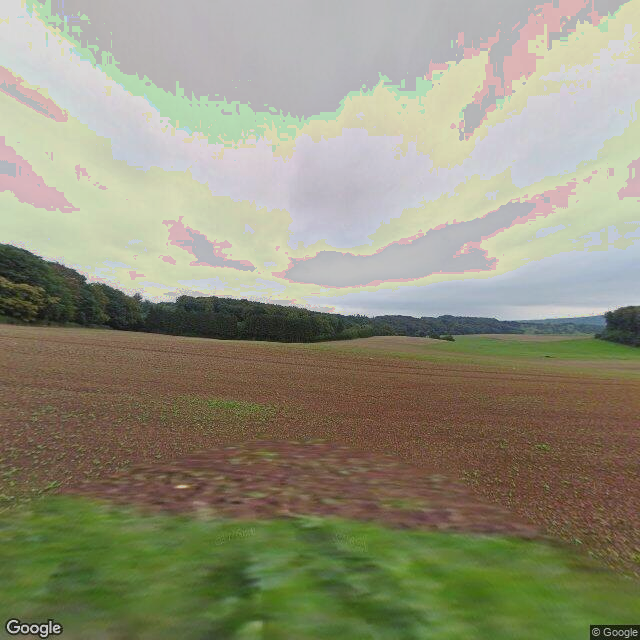

In [39]:
augmenter(Image.open(x_))

In [3]:
#results = BR.asses_photo(BR.train_dataloader.dataset[80])

## Cells below only works for FULL models

In [3]:
BR.prepare_dataloaders()

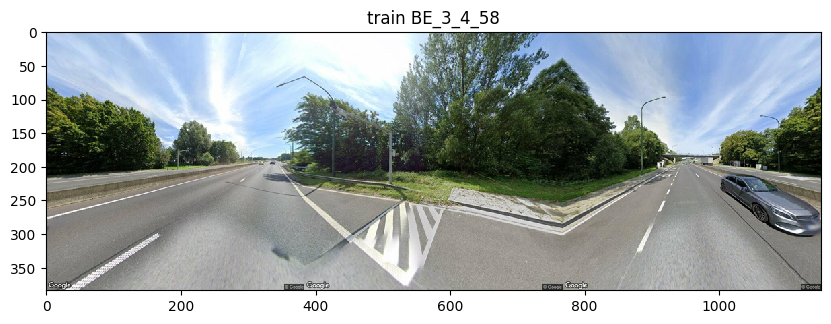

In [4]:
f = BR.extract_photo(33)

In [5]:
results1 = BR.gradient_track(BR.test_dataloader.dataset[33])

100%|██████████| 3/3 [03:40<00:00, 73.58s/it]


In [1]:
from huggingface_hub import notebook_login

In [2]:
notebook_login()

Token has not been saved to git credential helper.


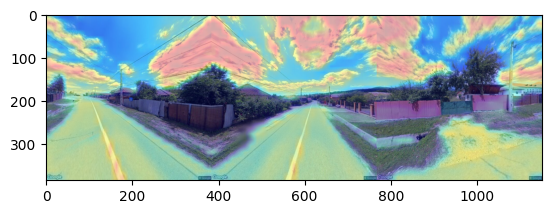

In [9]:
plt.imshow(results1)

# BRUTAL GRID SEARCH

In [ ]:
import gc

res = {}

for k in model_configurations.system_configs.keys():
    
    BR = system_loader(k)

    if __name__ == '__main__':

        BR.prepare_dataloaders()

        BR.train(300, k)

        save_system(BR, k)
    
    del BR
    torch.cuda.empty_cache()
    gc.collect()

In [63]:
from sklearn.metrics import root_mean_squared_error, r2_score
import gc

In [25]:
top_res = {}
for x in tqdm.tqdm(glob.glob("/media/krzysztof-kalisiak/146d42f3-2f6b-45ae-bee9-48e549dda8c4/storage/_SYSTEMS_/*.pkl")):

    with open(x, 'rb') as f:

        print(x)

        system = pickle.load(f)
        break
        system.train_dataloader = DataLoader(system.train_dataset, batch_size=system.batch_size, shuffle=True) 
        # num_workers=4, persistent_workers=True, multiprocessing_context='spawn', shuffle=True
        system.test_dataloader = DataLoader(system.test_dataset, batch_size=system.batch_size, shuffle=True)
        system.generate_test_main(on='test')
        
        side_tasks_RMSE = []
        for xx in ['GDP','max_temp','min_temp','precipitation','solar radiation','water vapour pressure','wind_speed']:
            side_tasks_RMSE.append(root_mean_squared_error(system.side_task_summary[xx]['real'], system.side_task_summary[xx]['pred']))

        p_l = []
        for precision in [2, 4, 6, 8, 12]:
            tt = system.task_summary['geolocation'].copy()
            tt = tt.applymap(lambda x: x[:precision])
            tt = tt.groupby('real')['pred'].value_counts().unstack(-1)
            tt = tt.reindex(tt.index, axis=1).fillna(0)
            test_acc = np.diag(tt).sum()/np.sum(tt.values, axis=None)
            p_l.append(test_acc)

        system.generate_test_main(on='train')
        p_l_tr = []
        for precision in [2, 4, 6, 8, 12]:
            tt = system.task_summary['geolocation'].copy()
            tt = tt.applymap(lambda x: x[:precision])
            tt = tt.groupby('real')['pred'].value_counts().unstack(-1)
            tt = tt.reindex(tt.index, axis=1).fillna(0)
            train_acc = np.diag(tt).sum()/np.sum(tt.values, axis=None)
            p_l_tr.append(train_acc)
    
    top_res[x.rsplit('/', 1)[1].split('.')[0]] = (p_l, p_l_tr, side_tasks_RMSE)

    del system
    torch.cuda.empty_cache()
    gc.collect()

with open('accuracy.pickle', 'wb') as handle:
    pickle.dump(top_res, handle, protocol=pickle.HIGHEST_PROTOCOL)

  0%|          | 0/41 [00:00<?, ?it/s]

/media/krzysztof-kalisiak/146d42f3-2f6b-45ae-bee9-48e549dda8c4/storage/_SYSTEMS_/SYS_ID_grid37.pkl


  0%|          | 0/41 [00:33<?, ?it/s]


In [6]:
with open('accuracy.pickle', 'rb') as handle:
    top_res = pickle.load(handle)

In [7]:
def f1(x):
    d = pd.DataFrame({'test':x[0], 'train':x[1]})
    d.columns = pd.MultiIndex.from_tuples([(x.name, y) for y in d.columns])
    return d
res = pd.DataFrame(top_res).T.apply(f1, axis=1)
res = pd.concat(res.values, axis=1)
res = res.T
res.columns = ['level1', 'level2', 'level3', 'level4', 'level5']



In [17]:
res_oth = pd.DataFrame({k:v[2] for k,v in top_res.items()}).T
res_oth.columns = ['GDP','max_temp','min_temp','precipitation','solar radiation','water vapour pressure','wind_speed']

In [33]:
system.side_task_summary['GDP']['real'].sample(system.side_task_summary['GDP']['real'].shape[0], replace=False)

id
15748.0    -0.799302
114859.0   -0.200703
86197.0     1.117827
121133.0   -0.092619
155253.0   -1.252263
              ...   
165044.0    0.759452
156324.0   -1.302748
135434.0   -0.052130
82809.0    -0.128965
167155.0    0.871846
Name: real, Length: 48978, dtype: float64

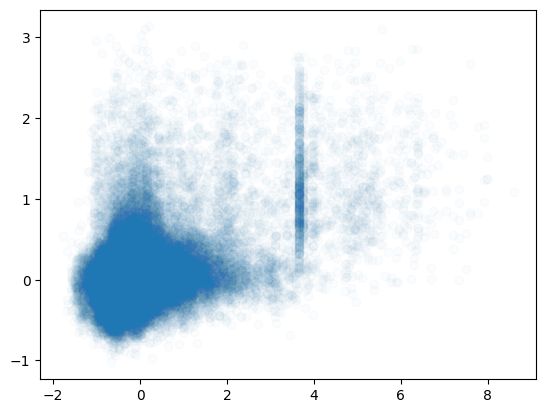

In [85]:
plt.scatter(system.side_task_summary['precipitation']['real'], system.side_task_summary['precipitation']['pred'], alpha=0.02)

In [68]:
r2_score(system.side_task_summary['GDP']['real'], system.side_task_summary['GDP']['pred'])

0.27563933924500605

In [64]:
r2_score(system.side_task_summary['GDP']['real'], system.side_task_summary['GDP']['real'].sample(system.side_task_summary['GDP']['real'].shape[0], replace=True))

-1.0019885734422105

In [65]:
r2_score(system.side_task_summary['max_temp']['real'], system.side_task_summary['max_temp']['real'].sample(system.side_task_summary['max_temp']['real'].shape[0], replace=True))

-0.9936440784239642

In [66]:
r2_score(system.side_task_summary['min_temp']['real'], system.side_task_summary['min_temp']['real'].sample(system.side_task_summary['min_temp']['real'].shape[0], replace=True))

-1.015883224473412

In [67]:
r2_score(system.side_task_summary['precipitation']['real'], system.side_task_summary['precipitation']['real'].sample(system.side_task_summary['precipitation']['real'].shape[0], replace=True))

-1.0018004508695904

In [58]:
root_mean_squared_error(system.side_task_summary['solar radiation']['real'], system.side_task_summary['solar radiation']['real'].sample(system.side_task_summary['solar radiation']['real'].shape[0], replace=True))

1.3508751923574192

In [61]:
root_mean_squared_error(system.side_task_summary['water vapour pressure']['real'], system.side_task_summary['water vapour pressure']['real'].sample(system.side_task_summary['water vapour pressure']['real'].shape[0], replace=True))

1.3537140201776452

In [62]:
root_mean_squared_error(system.side_task_summary['wind_speed']['real'], system.side_task_summary['wind_speed']['real'].sample(system.side_task_summary['wind_speed']['real'].shape[0], replace=True))

1.5331099256154812

In [19]:
res_oth.sort_values('GDP')

,GDP,max_temp,min_temp,precipitation,solar radiation,water vapour pressure,wind_speed
SYS_ID_grid8,0.835921,0.819304,0.848236,0.992540,0.803264,0.858579,1.022836
SYS_ID_grid5,0.840567,0.804135,0.839822,1.007257,0.788722,0.846366,1.008877
SYS_ID_grid31,0.842280,0.815179,0.849826,0.983484,0.799626,0.858273,1.004635
SYS_ID_grid34,0.842349,0.816402,0.852356,1.020776,0.803095,0.853836,1.029086
SYS_ID_grid1,0.842981,0.818949,0.856242,1.010712,0.806888,0.864486,1.017420
SYS_ID_grid39,0.843994,0.812049,0.845060,0.995750,0.796017,0.855894,1.028999
SYS_ID_grid42,0.844658,0.820199,0.846351,1.005187,0.795102,0.856209,1.030767
SYS_ID_grid33,0.845255,0.817061,0.845491,1.003469,0.797646,0.852964,1.001093
SYS_ID_grid21,0.845553,0.817052,0.850625,1.009441,0.802639,0.854994,1.019325
SYS_ID_grid7,0.845984,0.811491,0.843589,1.002275,0.795972,0.847236,1.029312


In [8]:
res_overfit = res.unstack(-1)

res_overfit.columns = res_overfit.columns.swaplevel(0, 1)

res_overfit['train']/res_overfit['test']

,level1,level2,level3,level4,level5
SYS_ID_grid1,1.123119,1.313208,1.449770,1.580040,1.579683
SYS_ID_grid10,1.125540,1.290863,1.393384,1.519653,1.520061
SYS_ID_grid11,1.071460,1.176992,1.256898,1.372236,1.372852
SYS_ID_grid12,1.102350,1.250942,1.373599,1.539168,1.538646
SYS_ID_grid13,1.086488,1.193348,1.275528,1.326367,1.326448
SYS_ID_grid14,1.102705,1.244664,1.355225,1.514116,1.514063
SYS_ID_grid15,1.128027,1.347968,1.539046,1.819718,1.819758
SYS_ID_grid16,1.103436,1.247523,1.330805,1.446450,1.445939
SYS_ID_grid17,1.129116,1.316955,1.468883,1.641147,1.641018
SYS_ID_grid18,1.170648,1.468014,1.758453,2.227463,2.227233


In [11]:
res_overfit['test']

,level1,level2,level3,level4,level5
SYS_ID_grid1,0.798464,0.507601,0.325842,0.169903,0.170042
SYS_ID_grid10,0.796257,0.509807,0.332053,0.173154,0.173282
SYS_ID_grid11,0.797973,0.501798,0.320775,0.164086,0.164167
SYS_ID_grid12,0.797319,0.518879,0.343004,0.186486,0.186685
SYS_ID_grid13,0.792743,0.500327,0.316362,0.164919,0.164986
SYS_ID_grid14,0.798137,0.511769,0.331971,0.172030,0.172185
SYS_ID_grid15,0.804348,0.522229,0.348889,0.189868,0.190039
SYS_ID_grid16,0.799199,0.507437,0.326986,0.165739,0.165970
SYS_ID_grid17,0.800588,0.517489,0.336711,0.179292,0.179395
SYS_ID_grid18,0.796829,0.521903,0.346355,0.184163,0.184299


In [9]:
r = []
for lvl in ['level1', 'level2', 'level3', 'level4', 'level5']:
    r.append(pd.Series({x:i for i, x in enumerate(res.loc[res.index.get_level_values(1)=='test'].sort_values(lvl, ascending=False).index.get_level_values(0))}))
pd.concat(r).groupby(level=0).sum().sort_values(ascending=True)

SYS_ID_grid38     17
SYS_ID_grid31     17
SYS_ID_grid36     19
SYS_ID_grid40     25
SYS_ID_grid3      28
SYS_ID_grid35     35
SYS_ID_grid6      39
SYS_ID_grid37     42
SYS_ID_grid39     42
SYS_ID_grid43     46
SYS_ID_grid42     48
SYS_ID_grid33     57
SYS_ID_grid32     60
SYS_ID_grid9      60
SYS_ID_grid30     63
SYS_ID_grid2      66
SYS_ID_grid5      66
SYS_ID_grid41     76
SYS_ID_grid34     85
SYS_ID_grid8      86
SYS_ID_grid15     89
SYS_ID_grid7     108
SYS_ID_grid12    115
SYS_ID_grid18    117
SYS_ID_grid17    124
SYS_ID_grid23    130
SYS_ID_grid27    130
SYS_ID_grid24    136
SYS_ID_grid4     139
SYS_ID_grid14    149
SYS_ID_grid10    151
SYS_ID_grid20    158
SYS_ID_grid1     159
SYS_ID_grid21    160
SYS_ID_grid16    167
SYS_ID_grid25    168
SYS_ID_grid22    172
SYS_ID_grid26    176
SYS_ID_grid11    183
SYS_ID_grid13    194
SYS_ID_grid19    198
dtype: int64

In [10]:
ru = []
for lvl in ['level1', 'level2', 'level3', 'level4', 'level5']:
    ru.append(pd.Series({x:i for i, x in enumerate(res.loc[res.index.get_level_values(1)=='train'].sort_values(lvl, ascending=True).index.get_level_values(0))}))
pd.concat(ru).groupby(level=0).sum().sort_values(ascending=True)

SYS_ID_grid19      3
SYS_ID_grid11      8
SYS_ID_grid21     10
SYS_ID_grid13     11
SYS_ID_grid26     18
SYS_ID_grid22     30
SYS_ID_grid20     34
SYS_ID_grid16     36
SYS_ID_grid24     38
SYS_ID_grid14     42
SYS_ID_grid10     51
SYS_ID_grid12     54
SYS_ID_grid1      60
SYS_ID_grid25     65
SYS_ID_grid27     67
SYS_ID_grid17     73
SYS_ID_grid23     80
SYS_ID_grid2      89
SYS_ID_grid4      90
SYS_ID_grid15     91
SYS_ID_grid7     102
SYS_ID_grid18    105
SYS_ID_grid5     108
SYS_ID_grid3     115
SYS_ID_grid6     120
SYS_ID_grid9     125
SYS_ID_grid8     132
SYS_ID_grid42    135
SYS_ID_grid43    142
SYS_ID_grid41    145
SYS_ID_grid40    146
SYS_ID_grid37    155
SYS_ID_grid36    161
SYS_ID_grid32    171
SYS_ID_grid38    174
SYS_ID_grid30    176
SYS_ID_grid39    179
SYS_ID_grid31    180
SYS_ID_grid33    192
SYS_ID_grid35    193
SYS_ID_grid34    194
dtype: int64

In [ ]:
WINNER ID38

## GAN powered image generation, (didnt't work)

In [ ]:
# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

nc = 3

In [4]:
64*16

1024

In [3]:
from torch import nn
import torch

In [4]:
nz = 100
ngf = 64

In [5]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.nc = 3
        self.ngf = 64
        self.nz = 100

        self.embed_layer = nn.Embedding(1188, self.nz)

        self.main = nn.Sequential(

            # input is Z, going into a convolution
            nn.ConvTranspose2d( self.nz+self.nz, self.ngf * 32, 4, 1, 0, bias=False),
            nn.BatchNorm2d(self.ngf * 32),
            nn.ReLU(True),

            nn.ConvTranspose2d(self.ngf * 32, self.ngf * 16, 4, 1, 0, bias=False),
            nn.BatchNorm2d(self.ngf * 16),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(self.ngf * 16, self.ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(self.ngf * 8),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(self.ngf * 8, self.ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.ngf * 4),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d( self.ngf * 4, self.ngf * 2, 4, 3, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d( self.ngf * 2, self.ngf, 4, 3, 1, bias=False),
            nn.BatchNorm2d(self.ngf),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d( self.ngf, self.nc, 4, 3, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, noise, input):

        x_embed = self.embed_layer(input)[:, :, None, None]
        x = torch.cat([noise, x_embed], 1)
        return self.main(x)

netG = Generator().to('cuda')

optimizerG = optim.Adam(netG.parameters())

In [6]:
BR.prepare_dataloaders()

In [7]:
_, preprocess = open_clip.create_model_from_pretrained('hf-hub:timm/ViT-SO400M-14-SigLIP-384', device=DEVICE)

In [8]:
del _

In [9]:
loss = nn.CrossEntropyLoss()

In [10]:
BR.train_dataloader = DataLoader(BR.train_dataset, batch_size=6, 
                                    num_workers=2, persistent_workers=True, 
                                    multiprocessing_context='spawn', shuffle=True) 

In [12]:
from torch.autograd import Variable

In [ ]:
import torchvision.transforms as T
transform = T.ToPILImage()

num_epochs = 100

d_values = {v:i for i, v in enumerate(BR.shp.index.values)}

losses = []

print("Starting Training Loop...")
# For each epoch
for epoch in range(16):
    print(epoch)
    loss_b = []

    for dummy in tqdm.tqdm(BR.train_dataloader, total=len(BR.train_dataloader)):


        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()

        noise = Variable(torch.randn(len(dummy[1][4]), nz, 1, 1)).to('cuda')

        loc_codes = torch.Tensor([d_values[x] for x in dummy[1][4]]).to(torch.int32).to('cuda')

        generated_image = netG(noise, loc_codes)

        res = []

        for j in range(generated_image.shape[0]):
            res.append(transform(generated_image[j, :, :, :]))

        res = torch.stack([preprocess(y) for y in res], dim=0).to('cuda')

        # Since we just updated D, perform another forward pass of all-fake batch through D
        reaction = BR.NN(res.detach())[1][0]
        # Calculate G's loss based on this output

        real_y = BR.real_output_extract(dummy[1])[1][0]

        errG = loss(reaction, real_y)
        errG.backward()
        optimizerG.step()

        loss_b.append(errG.item())


    losses.append(np.mean(loss_b))
    torch.save(netG, 'generator.pt')

Starting Training Loop...
0


100%|██████████| 8163/8163 [1:03:22<00:00,  2.15it/s]


1


100%|██████████| 8163/8163 [1:04:22<00:00,  2.11it/s]


2


100%|██████████| 8163/8163 [1:04:25<00:00,  2.11it/s]


3


100%|██████████| 8163/8163 [1:04:26<00:00,  2.11it/s]


4


100%|██████████| 8163/8163 [1:04:28<00:00,  2.11it/s]


5


100%|██████████| 8163/8163 [1:04:21<00:00,  2.11it/s]


6


100%|██████████| 8163/8163 [1:04:23<00:00,  2.11it/s]


7


100%|██████████| 8163/8163 [1:04:29<00:00,  2.11it/s]


8


100%|██████████| 8163/8163 [1:04:28<00:00,  2.11it/s]


9


100%|██████████| 8163/8163 [1:04:27<00:00,  2.11it/s]


10


100%|██████████| 8163/8163 [1:04:25<00:00,  2.11it/s]


11


100%|██████████| 8163/8163 [1:04:23<00:00,  2.11it/s]


12


100%|██████████| 8163/8163 [1:04:30<00:00,  2.11it/s]


13


  0%|          | 22/8163 [00:10<1:06:36,  2.04it/s]


KeyboardInterrupt: 

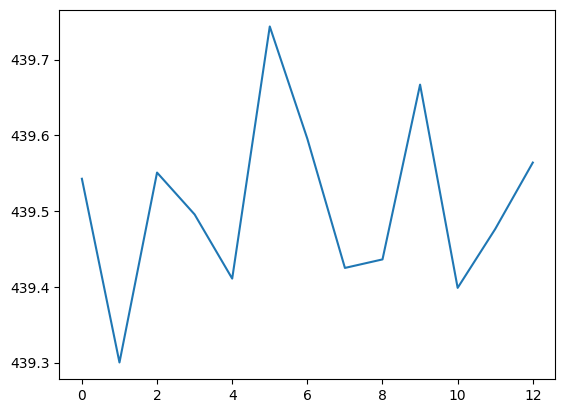

In [27]:
plt.plot(losses)